In [16]:
#imports
import os
import numpy as np
import matplotlib.pyplot as plt


In [17]:
# # Integrated line flux: (10^(-17) erg/s/cm^2)

# main_dir = "/home/users/kho108/Documents/ASTR480/hb_fit_results_test/"
# os.chdir(main_dir)
# filename = "hb_broad_fits.bin"
# line_properties = ["fwhm", "sigma", "ew", "peak", "area", "snr"]

# mags = [14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0]
# redshifts = [1.1]
# iterations = 100

# mean_of_fits = np.zeros((len(mags), len(redshifts), iterations, len(line_properties)), dtype=np.float64)
# std_of_fits = np.zeros((len(mags), len(redshifts), iterations, len(line_properties)), dtype=np.float64)

# def load_and_reshape_data(filename):
#     data = np.fromfile(filename, dtype=np.float64)
#     data = data.reshape((len(mags), len(redshifts), iterations, len(line_properties)))  # reshape to (mags, redshifts, iterations, line properties)
#     # print(data)
#     return data

# data = load_and_reshape_data(filename)

# for j, mag in enumerate(mags):
#     for k, redshift in enumerate(redshifts):
#         idx = 4  # Index for 'area' in line_properties
#         fits_values = data[j, k, :, idx]
#         mean = np.mean(fits_values)
#         std = np.std(fits_values)

#         # Scatter individual fits
#         plt.scatter(fits_values, [mag] * len(fits_values), alpha=0.5, color='red', s=5)

#         # Error bar for mean
#         plt.errorbar(mean, mag, xerr=std,
#                     color='blue', capsize=5, alpha=0.6, elinewidth=2)

#         plt.set_xlabel(f'{line_properties[idx]} Value')
#         plt.set_title(f'{line_properties[idx]}')
#         plt.grid()


# peak_index = line_properties.index("peak")  # Index of 'peak' in line_properties
# area_index = line_properties.index("area")  # Index of 'area' --> integrated line flux in line_properties

# fig, axes = plt.subplots(2, 3, figsize=(18, 18))
# # fig.suptitle(f'Spread vs Magnitude — Redshift: {redshifts[0]}', fontsize=16)

# for j, mag in enumerate(mags):
#     for k, redshift in enumerate(redshifts):
#         for idx, property in enumerate(line_properties):
#             row = idx // 3
#             col = idx % 3
#             ax = axes[row][col]

#             fits_values = data[j, k, :, idx]
#             mean = np.mean(fits_values)
#             std = np.std(fits_values)

#             # Scatter individual fits
#             ax.scatter(fits_values, [mag] * len(fits_values), alpha=0.5, color='red', s=5)

#             # Error bar for mean
#             ax.errorbar(mean, mag, xerr=std,
#                         color='blue', capsize=5, alpha=0.6, elinewidth=2)

#             ax.set_xlabel(f'{line_properties[idx]} Value')
#             ax.set_title(f'{line_properties[idx]}')
#             ax.grid()

# for ax in axes[:, 0]:
#     ax.set_ylabel('Magnitude')

# # plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit suptitle
# plt.show()


Current working directory: /home/users/kho108/Documents/ASTR480/hb_fit_results_3


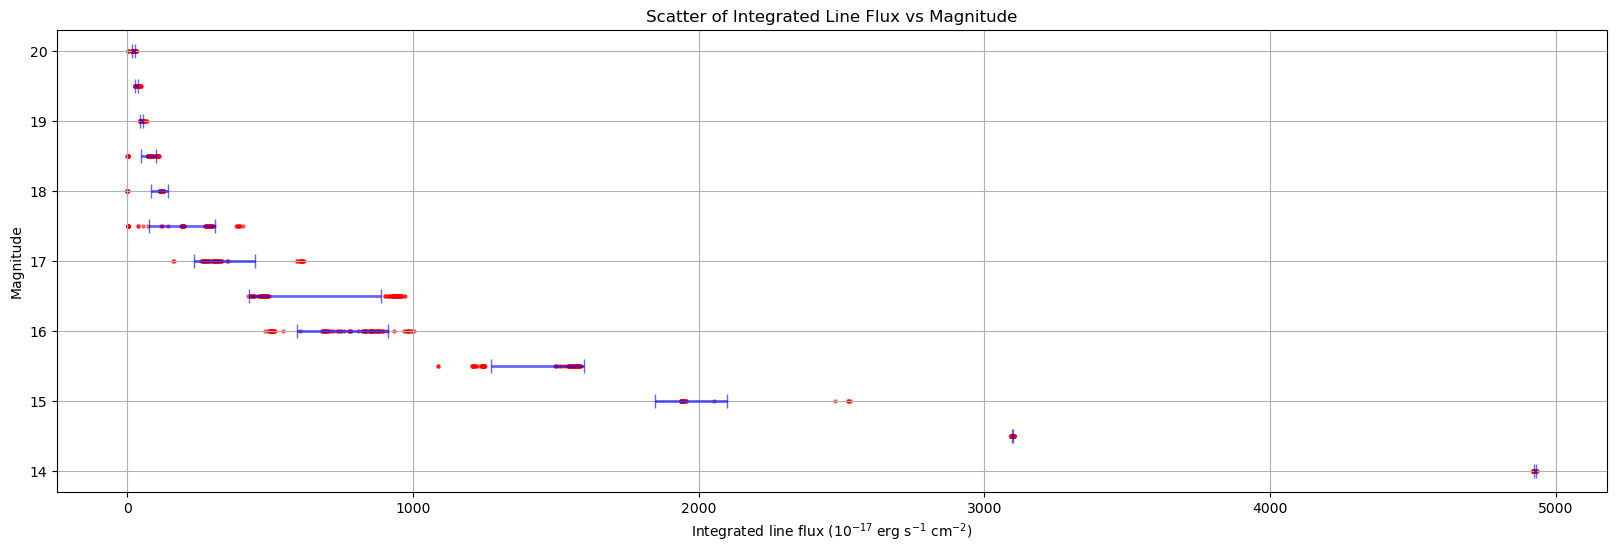

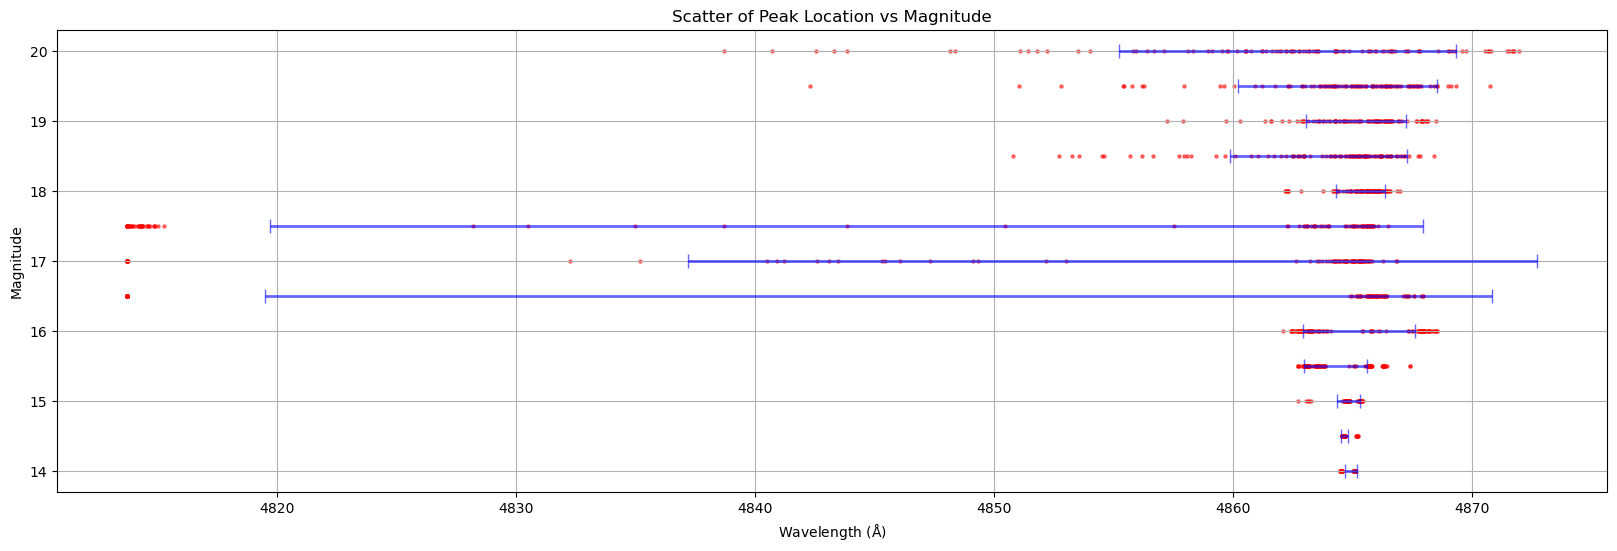

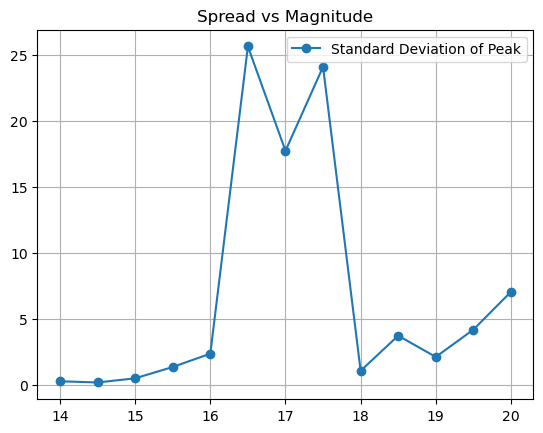

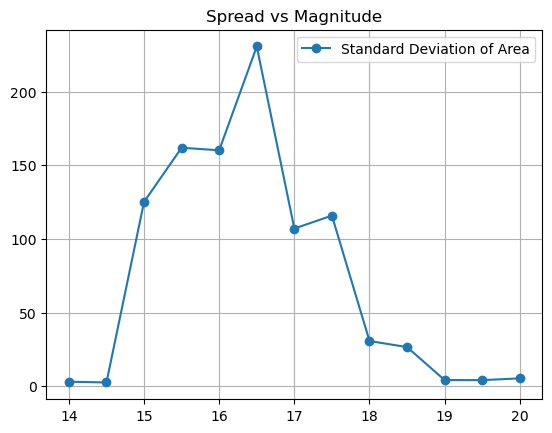

In [19]:
# Integrated line flux: (10^(-17) erg/s/cm^2)

main_dir = "/home/users/kho108/Documents/ASTR480/hb_fit_results_3/"
os.chdir(main_dir)
filename = "hb_broad_fits.bin"
line_properties = ["fwhm", "sigma", "ew", "peak", "area", "snr"]

mags = [14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0]

redshifts = [1.1]
iterations = 100
mean_of_fits = np.zeros((len(mags), len(redshifts), iterations, len(line_properties)), dtype=np.float64)
std_of_fits = np.zeros((len(mags), len(redshifts), iterations, len(line_properties)), dtype=np.float64)

def load_and_reshape_data(filename):
    data = np.fromfile(filename, dtype=np.float64)
    data = data.reshape((len(mags), len(redshifts), iterations, len(line_properties)))  # reshape to (mags, redshifts, iterations, line properties)
    # print(data)
    return data

data = load_and_reshape_data(filename)

std_peak = []
std_area = []


plt.figure(figsize=(20, 6))

for j, mag in enumerate(mags):
    if mag in [23, 24]:
        continue  # Skip magnitudes 23 and 24
    for k, redshift in enumerate(redshifts):
        idx = 4  # Index for 'area' in line_properties
        fits_values = data[j, k, :, idx]
        mean = np.mean(fits_values)
        std = np.std(fits_values)
        std_area.append(std)

        # Scatter individual fits
        plt.scatter(fits_values, [mag] * len(fits_values), alpha=0.5, color='red', s=5)

        # Error bar for mean
        plt.errorbar(mean, mag, xerr=std,
                    color='blue', capsize=5, alpha=0.6, elinewidth=2)

        plt.xlabel(r'Integrated line flux ($10^{-17}$ erg s$^{-1}$ cm$^{-2}$)')
        plt.title(f'Scatter of Integrated Line Flux vs Magnitude')
        plt.ylabel('Magnitude')
        plt.grid()
plt.savefig('int_line_flux_scatter.jpg', dpi=300)


plt.figure(figsize=(20, 6))

for j, mag in enumerate(mags):
    if mag in [23, 24]:
        continue  # Skip magnitudes 23 and 24

    for k, redshift in enumerate(redshifts):
        idx = 3  # Index for 'peak' in line_properties
        fits_values = data[j, k, :, idx]
        mean = np.mean(fits_values)
        std = np.std(fits_values)
        std_peak.append(std)

        # Scatter individual fits
        plt.scatter(fits_values, [mag] * len(fits_values), alpha=0.5, color='red', s=5)

        # Error bar for mean
        plt.errorbar(mean, mag, xerr=std,
                     color='blue', capsize=5, alpha=0.6, elinewidth=2)

plt.xlabel(r'Wavelength ($\mathrm{\AA}$)')
plt.title('Scatter of Peak Location vs Magnitude')
plt.ylabel('Magnitude')
plt.grid()
plt.savefig('peak_loc_scatter.jpg', dpi=300)


mags = [14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0]

import os
print("Current working directory:", os.getcwd())


#plot spead vs mag for integrated line flux:
plt.figure()
plt.plot(mags, std_peak, marker='o', label=f'Standard Deviation of Peak')
plt.title('Spread vs Magnitude')
plt.grid()
plt.legend()

plt.show()

plt.figure()
plt.plot(mags, std_area, marker='o', label=f'Standard Deviation of Area')
plt.title('Spread vs Magnitude')
plt.grid()

plt.legend()
